# TEST PARAMÉTRICOS CON PYTHON

Importando librerías necesarias

In [1]:
# librerías de apoyo
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_boston
# librerías especializadas
from scipy import stats
import statsmodels.api as sm
#librerías de visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 300)

Carga de datos

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Obtención del Dataframe
df_boston = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=list(boston['feature_names']) + ['MEDV'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- ***CRIM:     tasa de criminalidad per cápita por ciudad (cuantitativa continua)***
- ZN:       proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados (cuantitativa continua)
- INDUS:    proporción de acres comerciales no minoristas por ciudad (cuantitativa continua)
- ***CHAS:     Cercanía al Charles River (1 si el tramo limita con el río; 0 en caso contrario) (categórica nominal)***
- NOX:      concentración de óxidos nítricos (partes por 10 millones) (cuantitativa continua)
- ***RM:       número medio de habitaciones por vivienda (cuantitativa discreta)***
- AGE:      proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (cuantitativa continua)
- DIS:      distancias ponderadas a cinco centros de empleo de Boston (cuantitativa continua)
- RAD:      índice de accesibilidad a carreteras radiales (cuantitativa continua)
- TAX:      Tasa de impuesto a la propiedad de valor total por USD 10,000 (cuantitativa continua)
- ***PTRATIO:  Proporción alumno-maestro por ciudad (cuantitativa continua)***
- B:        1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad (cuantitativa continua)
- LSTAT:    porcentaje de la población de estatus bajo (cuantitativa continua)
- ***MEDV:     Valor medio de las viviendas ocupadas por sus propietarios en USD 1000 (cuantitativa continua)***

In [5]:
df_boston['CHAS'] = (df_boston['CHAS'].astype('int')).astype('object')
df_boston['RM'] = (df_boston['RM'].astype('int32'))

In [6]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int32  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int32(1), object(1)
memory usage: 53.5+ KB


In [7]:
df_boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,5.776680,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.778123,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.000000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.000000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.000000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.000000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.000000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


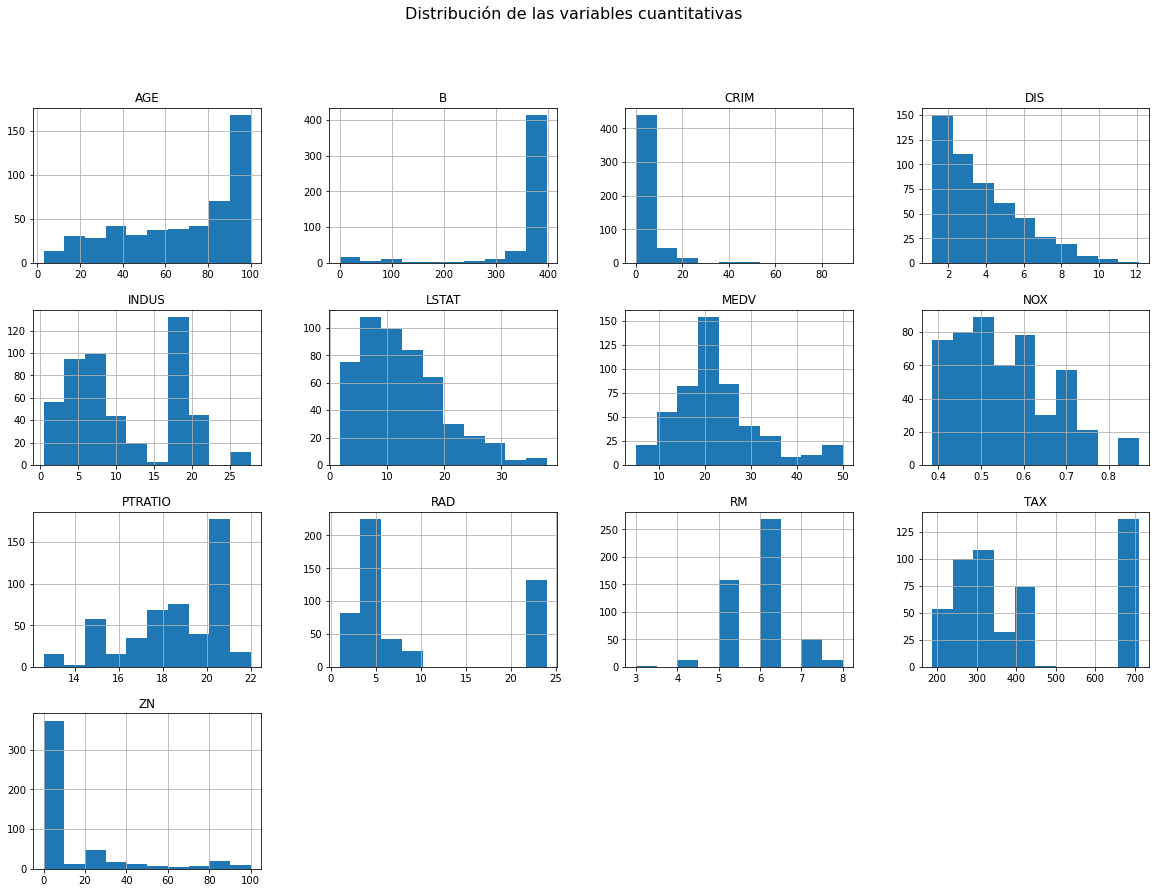

In [8]:
# plt.figure(figsize=(20,20))
df_boston.hist(bins='sturges', figsize=(20, 14))
plt.suptitle('Distribución de las variables cuantitativas', fontsize=16)
plt.show()

## Tests de Normalidad
#### W / S o rango estudentizado (q):
    • Sencillo, muy bueno para distribuciones simétricas y colas cortas.

    • Muy mal cuando hay asimetría.
#### Shapiro Wilk:
    • Prueba ómnibus bastante potente. No es bueno con muestras pequeñas o datos discretos.

    • Buena potencia con colas simétricas, cortas y largas. Bueno con asimetría.
#### Jarque-Bera:
    • Bueno con simétrico y largo distribuciones de cola.

    • Menos potente con asimetría y poca potencia con datos bimodales.
#### D'Agostino:
    • Bueno con distribuciones simétricas y muy bueno con distribuciones de cola larga.

    • Menos potente con asimetría.
#### Anderson-Darling:
    • Similar en poder a Shapiro-Wilk pero tiene menos poder con asimetría.

    • Funciona bien con datos discretos.
#### Pruebas de distancia (Kolmogorov-Smirnov, Lillifors, Chi2):
    • Todos tienden a tener menor potencia. Los datos tienen que ser muy anormales para rechazar Ho.

    • Estas pruebas pueden superar a otras pruebas cuando se utilizan datos discretos o agrupados.
___    
___
### Hipótesis a plantear:
    • H0: la distribución de la variabls NO es significativamente diferente a la de una distribución normal.

    • H1: la distribución de la variable es significativamente diferente a la de una distribución normal.


**Gráficos de QQ-PLOT**

<img src="QQ-PLOT.png" alt="drawing" style="width:800px;"/>

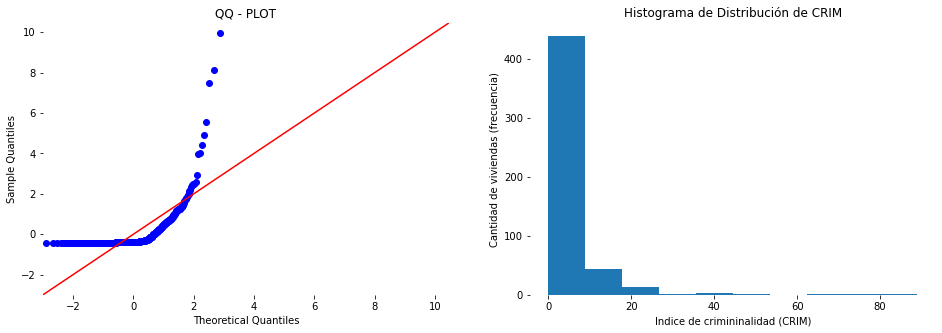

In [9]:
rvs = df_boston['CRIM']
plt.figure(figsize=(16,5))
ax1=plt.subplot(121, frameon=False)
sm.qqplot(rvs, ax=ax1, fit=True, line="45")
ax1.set_title('QQ - PLOT')
ax2=plt.subplot(122, frameon=False)
ax2.set_title('Histograma de Distribución de CRIM')
ax2.set_xlabel('Indice de crimininalidad (CRIM)')
ax2.set_ylabel('Cantidad de viviendas (frecuencia)')
ax2 = plt.hist(rvs, bins='sturges')
plt.show()

https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [10]:
def decision(pvalue, alpha):
    if pvalue < alpha:
        print('Decisión: Rechazar H0')
    else:
        print('Decisión: No Rechazar H0')       

### Test de Kolmogorov-Smirnov

In [11]:
rvs = df_boston['CRIM']
cdf = 'norm'
alpha = 0.05
ph = stats.kstest(rvs, cdf, alternative='two-sided', mode='auto')  # Compara la dist. de 2 variables
print(ph, end='\n\n')
decision(ph[1], alpha)

KstestResult(statistic=0.5025212984276741, pvalue=9.101764614072096e-119)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

- Otra manera:

In [12]:
ph = stats.ks_1samp(rvs, stats.norm.cdf)   # Compara dist. de 1 variable con una dist. teórica
print(ph, end='\n\n')
decision(ph[1], alpha)

KstestResult(statistic=0.5025212984276741, pvalue=9.101764614072096e-119)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html

### Test de Shapiro Wilk

In [13]:
ph = stats.shapiro(rvs)
print(ph, end='\n\n')
decision(ph[1], 0.05)

ShapiroResult(statistic=0.44996464252471924, pvalue=1.3285517473179391e-36)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

### Test basado en los test de D’Agostino and Pearson’s (asímetria y curtosis)

In [14]:
alpha = 0.05
ph = stats.normaltest(rvs)
print(ph, end='\n\n')
decision(ph[1], alpha)

NormaltestResult(statistic=562.7482944823795, pvalue=6.320631961562874e-123)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

### Librería Pingouin

In [15]:
import pingouin as pg
pg.normality(rvs, method='normaltest')

,W,pval,normal
CRIM,562.748294,6.320632e-123,False


In [16]:
pg.normality(rvs, method='shapiro', alpha=0.05)

,W,pval,normal
CRIM,0.449965,1.328552e-36,False


https://pingouin-stats.org/generated/pingouin.normality.html

In [17]:
pg.normality(df_boston, method='normaltest', alpha=0.01).round(4)

,W,pval,normal
CRIM,562.7483,0.0000,False
ZN,228.2703,0.0000,False
INDUS,420.0957,0.0000,False
NOX,37.5097,0.0000,False
RM,15.1153,0.0005,False
AGE,114.1654,0.0000,False
DIS,66.9450,0.0000,False
RAD,116.9444,0.0000,False
TAX,253.2165,0.0000,False
PTRATIO,45.9450,0.0000,False


## Tests de Varianzas

### Test de Varianza

MEDV: Valor medio de las viviendas ocupadas por sus propietarios en USD 1000 (cuantitativa continua)

La desviación estándar del valor medio de las viviendas es a lo sumo de 10 mil USD
   - H0: $\sigma^2 \leq 100$ 
   - H1: $\sigma^2 > 100$
   
   - $\alpha$ = 0.10
   
   $X^2 = (n -1) * S^2 / \sigma^2$

In [18]:
np.std(df_boston['MEDV'])

9.188011545278203

In [19]:
alpha = 0.10
rvs = df_boston['MEDV']
gl = len(rvs) - 1  # grados de libertad del numerador
X2 = gl * np.var(rvs) / 100   # Estadístico X2

p_value = stats.chi2.sf(X2, gl) 
print(f'Estadístico: {X2}, p-value: {p_value}\n')
decision(p_value, alpha)

Estadístico: 426.31875858863606, p-value: 0.9952870437161091

Decisión: No Rechazar H0


### Test de Comparación de Varianzas

La varianza del número de habitaciones promedio de los suburbios en Boston que limitan con el río Charles difiere de los que no limitan con el río.
   - H0: $\sigma^2_l = \sigma^2_n$ 
   - H1: $\sigma^2_l \neq \sigma^2_n$
   
   - $\alpha$ = 0.05

In [20]:
alpha = 0.05

rvs_l = df_boston[df_boston['CHAS']==1]['RM']   
rvs_n = df_boston[df_boston['CHAS']==0]['RM']
gl_l = len(rvs_l) - 1  # grados de libertad del numerador
gl_n = len(rvs_n) - 1  # grados de libertad del denominador
F = np.var(rvs_l) / np.var(rvs_n)   # Estadístico F

p_value = stats.f.sf(F, gl_l, gl_n) 
print(f'Estadístico: {F}, p-value: {p_value}\n')
decision(p_value, alpha)
if p_value < alpha:
    varianzas_iguales = False
    print('Varianzas desiguales significativa')
else:
    varianzas_iguales = True
print('\tIgualdad de varianzas significativa')

Estadístico: 1.2028754879009254, p-value: 0.20433411657478767

Decisión: No Rechazar H0
	Igualdad de varianzas significativa


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

## Tests de Medias

### Test de Media

La media del número de habitaciones de las casas en los suburbios de Boston es menor a 3
   - H0: $\mu \geq 3$ 
   - H1: $\mu < 3$
   
   - $\alpha$ = 0.01

In [21]:
alpha = 0.01
rvs = df_boston['RM']
ph = stats.ttest_1samp(rvs, 3)
print(ph, end='\n\n')
decision(ph[1]/2, alpha)   # Se divide entre 2 el p-value, debido a que el p-value que arroja dicha función es para el caso bilateral

Ttest_1sampResult(statistic=80.26995054930084, pvalue=1.1849136261457825e-289)

Decisión: Rechazar H0


La probabilidad de obtener la media muestral de 3 o más, es menor que el nivel alfa.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

### Ejemplo gráfico del Rechazo de H0 (Prueba unilateral derecha)

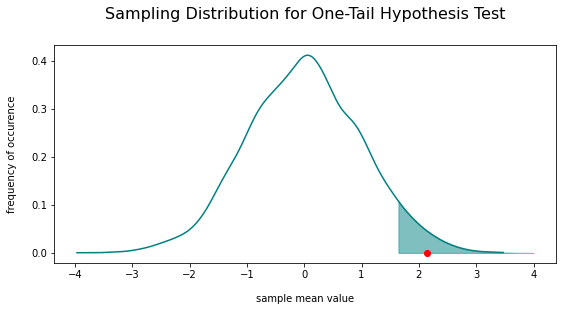

In [22]:
values = np.random.normal(loc=0, scale=1, size=6000)
two_std_from_mean = np.mean(values) + np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.figure(figsize=(9, 4))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 4, 100)
plt.plot(two_std_from_mean + .5, 0, 'ro') 
plt.fill_between(shade, kde(shade), alpha=0.5, color='teal')
plt.title("Sampling Distribution for One-Tail Hypothesis Test\n", y=1.015, fontsize=16)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

### Gráfico del Rechazo de H0 (Prueba unilateral derecha), del test de media.

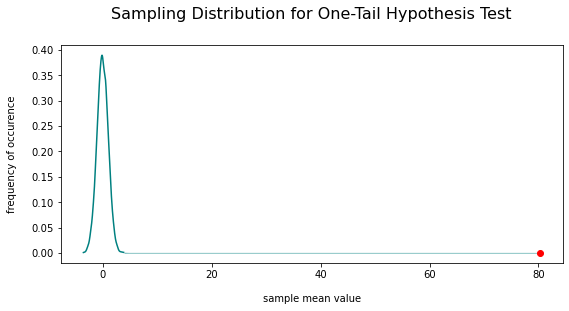

In [23]:
values = np.random.normal(loc=0, scale=1, size=6000)
two_std_from_mean = ph[0] #np.mean(values) + np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.figure(figsize=(9, 4))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 4, 100)
plt.plot(ph[0], 0, 'ro') 
plt.fill_between(shade, kde(shade), alpha=0.4, color='teal')
plt.title("Sampling Distribution for One-Tail Hypothesis Test\n", y=1.015, fontsize=16)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

### Test de Medias independientes

El número medio de habitaciones de las casas en los suburbios de Boston que limitan con el Río Charles difiere del que no limitan.
   - H0: $\mu_c = \mu_l$
   - H1: $\mu_c \neq \mu_l$
   
   - $\alpha$ = 0.05

In [24]:
alpha = 0.05
rvs_c = df_boston[df_boston['CHAS']==0]['RM']
rvs_l = df_boston[df_boston['CHAS']==1]['RM']
ph = hp = stats.ttest_ind(rvs_c, rvs_l, equal_var=varianzas_iguales)
print(ph, end='\n\n')
decision(ph[1], alpha)

Ttest_indResult(statistic=-1.536774391379978, pvalue=0.12497609099482575)

Decisión: No Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

### Tests de Medias Apareadas

---
***NOTA***: En este apartado se utilizan otros datos y no los del dataset de Boston

---
El protocolo de anestesia utilizado acualmente para controlar el dolor en cirugía de apéndice surte distinto efecto en pacientes del grupo etario menor de 18 años.

***Definamos*** --> $\mu_A$: manejo del dolor medio en pacientes menores a 18 años - $\mu_B$: manejo del dolor medio en pacientes de 18 años y mayores
   - H0: $\mu_A = \mu_B$ 
   - H1: $\mu_A \neq \mu_B$
   
   - $\alpha$ = 0.01

In [25]:
pA = np.random.randint(2, 5, size=100)
pB = np.random.randint(3, 5, size=100)
pA, pB

(array([3, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 3, 3, 3, 4, 4, 2, 4, 3, 3, 4, 3,
        2, 3, 3, 4, 2, 2, 4, 2, 2, 3, 2, 4, 3, 4, 2, 3, 4, 2, 3, 3, 2, 2,
        4, 4, 4, 4, 4, 2, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 2, 2, 3, 4, 4,
        2, 4, 3, 2, 2, 3, 2, 3, 4, 3, 2, 3, 3, 2, 2, 2, 4, 4, 4, 4, 3, 2,
        2, 3, 2, 3, 2, 4, 2, 4, 4, 4, 3, 2]),
 array([4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4,
        4, 3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3,
        4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,
        4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4,
        4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3]))

In [26]:
alpha = 0.01
ph = stats.ttest_rel(pA, pB)
print(ph, end='\n\n')
decision(ph[1], alpha)

Ttest_relResult(statistic=-5.940891553835152, pvalue=4.236210073283113e-08)

Decisión: Rechazar H0


____
***Veamos otro ejemplo:***
____

El manejo del dolor en cirugía de apéndice es menor en las primeras 24 horas del post quirúrgico, en pacientes mayores de 50 años.

***Definamos*** --> $\mu_A$: manejo del dolor medio en las primeras 24 horas del post quirúrgico - $\mu_B$: manejo del dolor medio pasadas las 24 horas del post quirúrgico
   - H0: $\mu_A = \mu_B$ 
   - H1: $\mu_A < \mu_B$
   
   - $\alpha$ = 0.05

In [27]:
mA = np.random.randint(5, 8, size=50)
mB = np.random.randint(2, 6, size=50)
mA, mB

(array([7, 6, 5, 5, 5, 7, 7, 6, 7, 5, 5, 5, 6, 5, 5, 7, 7, 5, 6, 7, 7, 6,
        7, 5, 7, 5, 7, 7, 5, 7, 6, 6, 7, 5, 7, 5, 5, 6, 6, 7, 6, 5, 7, 5,
        5, 7, 7, 5, 6, 7]),
 array([3, 4, 2, 3, 2, 3, 2, 5, 4, 5, 3, 5, 5, 3, 5, 5, 5, 2, 2, 4, 3, 4,
        4, 4, 5, 3, 5, 3, 3, 3, 4, 4, 2, 5, 3, 5, 2, 5, 5, 4, 5, 4, 4, 2,
        5, 3, 4, 2, 4, 5]))

In [28]:
alpha = 0.05
ph = stats.ttest_rel(mA, mB)
print(ph, end='\n\n')
decision(ph[1]/2, alpha)   # Se divide entre 2 el p-value, debido a que el p-value que arroja dicha función es para el caso bilateral

Ttest_relResult(statistic=12.101501050845544, pvalue=2.4781342765261076e-16)

Decisión: Rechazar H0


## Tests para 3 o más medias

### Tests de ANOVA

Supuestos de ANOVA:
- Los datos se distribuyen normalmente
- Las muestras son independientes entre sí
- Las poblaciones tienen todas igual varianza (homoscedasticidad)

In [29]:
out, bins = pd.qcut(df_boston['PTRATIO'], 3, labels=[1, 2, 3], retbins=True, precision=3, duplicates='raise')
out, bins

(0      1
 1      1
 2      1
 3      2
 4      2
       ..
 501    3
 502    3
 503    3
 504    3
 505    3
 Name: PTRATIO, Length: 506, dtype: category
 Categories (3, int64): [1 < 2 < 3],
 array([12.6, 17.8, 20.2, 22. ]))

In [30]:
df_boston['PTRATIO_categoric'] = out.values
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PTRATIO_categoric
0,0.00632,18.0,2.31,0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2


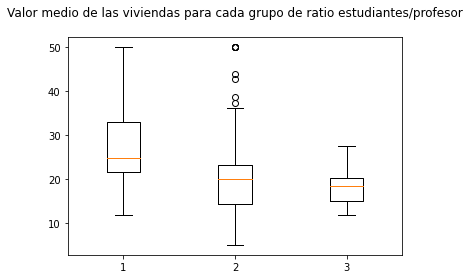

In [31]:
g1 = df_boston[df_boston['PTRATIO_categoric']==1]['MEDV']
g2 = df_boston[df_boston['PTRATIO_categoric']==2]['MEDV']
g3 = df_boston[df_boston['PTRATIO_categoric']==3]['MEDV']
data = [g1, g2, g3]
plt.title('Valor medio de las viviendas para cada grupo de ratio estudiantes/profesor\n')
plt.boxplot(data)
plt.show()

No existe diferencias en la media de los valores de las viviendas en los surburbios de Boston con respecto a los grupos de ratio estudiantes/profesor.
   - H0: $\mu_1 = \mu_2 = \mu_3$
   - H1: Al menos una media es distinta
   
   - $\alpha$ = 0.05

In [32]:
ph = stats.f_oneway(g1, g2, g3)
print(ph, end='\n\n')
decision(ph[1], alpha)

F_onewayResult(statistic=64.65300929756505, pvalue=1.0259550972373208e-25)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

### Test Post-hoc de Tukey

No existe diferencias en la media de los valores de las viviendas en los surburbios de Boston con respecto a los grupos de ratio estudiantes/profesor.
   - H0: $\mu_1 = \mu_2$
   - H0: $\mu_1 = \mu_3$
   - H0: $\mu_2 = \mu_3$
   
   - $\alpha$ = 0.05

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df_boston['MEDV'], groups=df_boston['PTRATIO_categoric'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.3893  0.001 -10.2597  -6.519   True
     1      3 -10.1038  0.001 -13.0723 -7.1353   True
     2      3  -1.7145 0.3303  -4.5463  1.1173  False
-----------------------------------------------------


## Tests de proporciones

### Test de proporción

La proporción de tasa de criminalidad per cápita (CRIM) mayor a 1 se presenta en más del 40% de los suburbios de Boston
   - H0: $p \leq 0.4 $
   - H1: $p > 0.4 $
   
   - $\alpha$ = 0.05

In [34]:
p_crim = len(df_boston[df_boston['CRIM'] > 1]) / len(df_boston)
p_crim

0.3438735177865613

In [35]:
alpha = 0.05
# Número de suburbios que registran Índice de Criminalidad per cápita mayor a 1
count = (df_boston['CRIM'] > 1).sum()
# Número total de suburbios en estudio
nobs = len(df_boston)
P = 0.4

from statsmodels.stats import proportion
stat, p_value = proportion.proportions_ztest(count, nobs, P, alternative='larger')  # ‘two-sided’, ‘smaller’--> unilateral izquierda - ‘larger’--> unilateral derecha

print(f'Estadístico: {stat}, p-value: {p_value}\n')
decision(p_value, alpha)

Estadístico: -2.65796912871689, p-value: 0.9960693453128129

Decisión: No Rechazar H0


https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

### Test de comparación de proporciones

La proporción de tasa de criminalidad per cápita (CRIM) mayor a 1 es superior en los suburbios que limitan con el río Charles
   - H0: $p_l \leq p_n $
   - H1: $p_l > p_n $
   
   - $\alpha$ = 0.01

In [36]:
print(f"pl: {(df_boston[df_boston['CHAS']==1]['CRIM'] > 1).sum()/len(df_boston)} - pn: {(df_boston[df_boston['CHAS']==0]['CRIM'] > 1).sum()/len(df_boston)}")

pl: 0.029644268774703556 - pn: 0.3142292490118577


In [37]:
alpha = 0.01
# Número de suburbios que registran Índice de Criminalidad per cápita mayor a 1, 
# que limitan y no limitan con el río Charles
count = np.array([(df_boston[df_boston['CHAS']==1]['CRIM'] > 1).sum(), (df_boston[df_boston['CHAS']==0]['CRIM'] > 1).sum()])

# Número total de suburbios en estudio
nobs = np.array([len(df_boston), ]*2)

stat, p_value = proportion.proportions_ztest(count, nobs, alternative='larger')   # ‘two-sided’, ‘smaller’--> H1: prop < value - ‘larger’--> H1: prop > value
print(f'Estadístico: {stat}, p-value: {p_value}\n')
decision(p_value, alpha)

Estadístico: -11.99654299640953, p-value: 1.0

Decisión: No Rechazar H0
